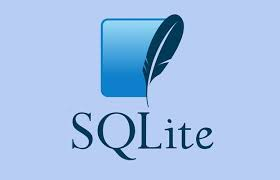

# Exploratory Data Analysis with SQL

This notebook uses the 120 years of Olympics History dataset from Kaggle.

For the purpose of practice of SQL syntax the 1% of the dataset was sampled and loaded into a sqlite database file. Hence, the database table, **`athletes`**, has just 2169 rows unlike the original dataset.

#### List of Questions

- How many olympics games have been held?
- List down all Olympics games held so far.
- Mention the total no of nations who participated in each olympics game?
- Which year saw the highest and lowest no of countries participating in olympics?
- Which nation has participated in all of the olympic games?
- Identify the sport which was played in all summer olympics.
- Which Sports were just played only once in the olympics?
- Fetch the total no of sports played in each olympic games.
- Fetch details of the oldest athletes to win a gold medal.
- Find the Ratio of male and female athletes participated in all olympic games.


# Connect to SQLite DB

In [1]:
!pip install sqlalchemy
!pip install ipython-sql

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
%load_ext sql

In [3]:
import csv, sqlite3

In [4]:
con = sqlite3.connect("athletes.db")
cur = con.cursor()

In [5]:
%sql sqlite:///athletes.db

In [13]:
%%sql

SELECT * FROM athletes LIMIT 5;

 * sqlite:///athletes.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
11592,Aranka Binder,F,26.0,163.0,47.0,Individual Olympic Athletes,IOA,1992 Summer,1992,Summer,Barcelona,Shooting,"Shooting Women's Air Rifle, 10 metres",Bronze
26774,Frederik Albert De Waele,M,33.0,None,None,Belgium,BEL,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Parallel Bars,None
132574,Yang Yun,F,15.0,158.0,40.0,China,CHN,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Individual All-Around,None
73415,Jan Magiera,M,26.0,178.0,78.0,Poland,POL,1964 Summer,1964,Summer,Tokyo,Cycling,"Cycling Men's Road Race, Individual",None
64978,Ludwig Kng,M,26.0,172.0,68.0,Switzerland,SUI,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Lightweight, Freestyle",None


#### 1. How many olympics games have been held?

In [6]:
%%sql

SELECT COUNT(DISTINCT Games) AS Num_of_Games 
FROM athletes;

 * sqlite:///athletes.db
Done.


Num_of_Games
51


#### 2. List down all Olympics games held so far.

In [7]:
%%sql

SELECT DISTINCT Games
FROM athletes;

 * sqlite:///athletes.db
Done.


Games
1992 Summer
1952 Summer
2000 Summer
1964 Summer
1996 Summer
1932 Summer
1980 Summer
2004 Summer
1976 Summer
1924 Summer


#### 3. Mention the total no of nations who participated in each olympics game?

In [8]:
%%sql

SELECT Games, COUNT(DISTINCT Team) AS Num_of_Nation
FROM athletes
GROUP BY Games;

 * sqlite:///athletes.db
Done.


Games,Num_of_Nation
1896 Summer,3
1900 Summer,10
1904 Summer,3
1906 Summer,8
1908 Summer,13
1912 Summer,18
1920 Summer,15
1924 Summer,21
1924 Winter,3
1928 Summer,23


#### 4. Which year saw the highest and lowest no of countries participating in olympics?

In [16]:
%%sql

SELECT Year, COUNT(DISTINCT Team) AS Total_Num_of_Countries
FROM athletes
GROUP BY Year
ORDER BY Total_Num_of_Countries DESC
LIMIT 1;

 * sqlite:///athletes.db
Done.


Year,Total_Num_of_Countries
2016,64


In [17]:
%%sql

SELECT Year, COUNT(DISTINCT Team) AS Total_Num_of_Countries
FROM athletes
GROUP BY Year
ORDER BY Total_Num_of_Countries ASC
LIMIT 1;

 * sqlite:///athletes.db
Done.


Year,Total_Num_of_Countries
1896,3


### ANOTHER WAY OF GETTING THE MIN MAX

In [21]:
%%sql

SELECT Year, MAX(Total_Num_of_Countries)
FROM
    (SELECT Year, COUNT(DISTINCT Team) AS Total_Num_of_Countries
    FROM athletes
    GROUP BY Year);

 * sqlite:///athletes.db
Done.


Year,MAX(Total_Num_of_Countries)
2016,64


In [22]:
%%sql

SELECT Year, MIN(Total_Num_of_Countries)
FROM
    (SELECT Year, COUNT(DISTINCT Team) AS Total_Num_of_Countries
    FROM athletes
    GROUP BY Year);

 * sqlite:///athletes.db
Done.


Year,MIN(Total_Num_of_Countries)
1896,3


#### 5. Fetch the total no of sports played in each olympic games.

In [23]:
%%sql

SELECT Games, COUNT(Sport) AS Total_sport_played
FROM athletes
GROUP BY Games;

 * sqlite:///athletes.db
Done.


Games,Total_sport_played
1896 Summer,3
1900 Summer,13
1904 Summer,14
1906 Summer,10
1908 Summer,25
1912 Summer,28
1920 Summer,35
1924 Summer,45
1924 Winter,3
1928 Summer,46


#### 6. Fetch details of the oldest athletes to win a gold medal.

In [26]:
%%sql

SELECT * 
FROM athletes
WHERE Medal = "Gold"
ORDER BY Age DESC
LIMIT 1;

 * sqlite:///athletes.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
57371,Franz Kapus,M,46.0,188.0,92.0,Switzerland-1,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Bobsleigh,Bobsleigh Men's Four,Gold


### ANOTHER WAY OF DOING IT USING SUB-QUERY

In [27]:
%%sql

SELECT *
FROM (SELECT * 
    FROM athletes
    WHERE Medal = "Gold")
ORDER BY Age DESC
LIMIT 1;


 * sqlite:///athletes.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
57371,Franz Kapus,M,46.0,188.0,92.0,Switzerland-1,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Bobsleigh,Bobsleigh Men's Four,Gold


#### 7. Find the Ratio of male and female athletes participated in all olympic games.

In [29]:
%%sql

SELECT Sex, COUNT(*) AS Count_of_athletes
FROM athletes
GROUP BY Sex;

 * sqlite:///athletes.db
Done.


Sex,Count_of_athletes
F,657
M,1512


#### 8. How many Gold medals were won during Summer and Winter seasons?

In [30]:
%%sql

SELECT Season, COUNT(*) AS Gold_Medals
FROM athletes
WHERE Medal = "Gold"
GROUP BY Season;


 * sqlite:///athletes.db
Done.


Season,Gold_Medals
Summer,90
Winter,14


#### 9. What is the age of the heaviest athlete?

In [31]:
%%sql

SELECT *
FROM
    (SELECT Age, MAX(Weight)
    FROM athletes);


 * sqlite:///athletes.db
Done.


Age,MAX(Weight)
25.0,161.0


#### 10. What team won the most Gold medals?

In [43]:
%%sql

SELECT Team, COUNT(Medal) AS Gold_count
FROM athletes
WHERE Medal = "Gold"
GROUP BY Team
ORDER BY Gold_count DESC
LIMIT 1;

 * sqlite:///athletes.db
Done.


Team,Gold_count
United States,7


<div class="alert alert-block alert-danger">
    <h1>CLOSE DB CONNECTION!!!</h1>
</div>

In [44]:
con.close()